# Chapter 12 -- Additional Data Handling

In [1]:
import polars as pl
from IPython.display import Image

## Sort and Sort Sequences

The example below is used in [Chapter 8-Time Series and Date Handling](08-Time_Series_and_Date_Handling.ipynb).

In [14]:
df = pl.read_csv(
    r"data/HPI_master.csv",
    infer_schema_length=10_000,  # look through 1000 rows to determine appropriate types
)

In [15]:
df.head()

hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
str,str,str,str,str,str,i64,i64,f64,f64
"""traditional""","""purchase-only""","""monthly""","""USA or Census Division""","""East North Central Division""","""DV_ENC""",1991,1,100.0,100.0
"""traditional""","""purchase-only""","""monthly""","""USA or Census Division""","""East North Central Division""","""DV_ENC""",1991,2,101.03,101.11
"""traditional""","""purchase-only""","""monthly""","""USA or Census Division""","""East North Central Division""","""DV_ENC""",1991,3,101.4,101.08
"""traditional""","""purchase-only""","""monthly""","""USA or Census Division""","""East North Central Division""","""DV_ENC""",1991,4,101.79,101.1
"""traditional""","""purchase-only""","""monthly""","""USA or Census Division""","""East North Central Division""","""DV_ENC""",1991,5,102.44,101.5


In [16]:
df_states = df.filter(pl.col('frequency') == 'quarterly')
df_states.head()

hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
str,str,str,str,str,str,i64,i64,f64,f64
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Abilene, TX""","""10180""",1986,3,107.49,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Abilene, TX""","""10180""",1986,4,94.95,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Abilene, TX""","""10180""",1987,1,100.91,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Abilene, TX""","""10180""",1987,2,100.76,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Abilene, TX""","""10180""",1987,3,94.02,null


The following SAS Data Step reads the same .csv file using FIRSTOBS= to begin reading from an arbitary row position.

````
    /********************************/
    /* c09_read()_csv_df_states.sas */
    /********************************/
    data df_states;
          infile 'C:\Data\HPI_master.csv' delimiter=',' missover dsd firstobs=3081; 
          informat hpi_type $12.
                   hpi_flavor $16.
                   frequency $9.
                   level $28.
                   place_name $33.
                   place_id $8.
                   yr $5.
                   period $6.
                   index_nsa 8.;
             input hpi_type $
                   hpi_flavor $
                   frequency $
                   level $
                   place_name $
                   place_id $
                   yr $
                   period $
                   index_nsa ;
````

Verify the read using the .shape attribute.

In [17]:
df_states.shape

(96245, 10)

Inspect the first 5 rows of the 'df_states' DataFrame.

In [18]:
df_states.head()

hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
str,str,str,str,str,str,i64,i64,f64,f64
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Abilene, TX""","""10180""",1986,3,107.49,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Abilene, TX""","""10180""",1986,4,94.95,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Abilene, TX""","""10180""",1987,1,100.91,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Abilene, TX""","""10180""",1987,2,100.76,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Abilene, TX""","""10180""",1987,3,94.02,null


Inspect the first 5 rows of the SAS data set df_states.

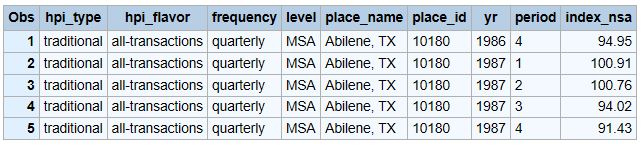

In [19]:
Image(filename='img/df_states_output.jpg')  

Exam the default sort by supplying the the sort key as the minimum argument to the .sort_values() attribute.  The sort operation creates the new 'default_srt' DataFrame.

In [20]:
default_srt = df_states.sort('index_nsa')

Display the first 4 rows of the sorted DataFrame 'default_srt'

In [21]:
default_srt.head()

hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
str,str,str,str,str,str,i64,i64,f64,f64
"""traditional""","""all-transactions""","""quarterly""","""State""","""Vermont""","""VT""",1976,1,null,null
"""traditional""","""all-transactions""","""quarterly""","""State""","""West Virginia""","""WV""",1982,1,null,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""San Francisco-Redwood City-Sou…","""41884""",1975,3,18.31,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""San Jose-Sunnyvale-Santa Clara…","""41940""",1975,4,18.82,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""Honolulu ('Urban Honolulu'), H…","""46520""",1981,4,18.91,null


By examing the first the first four rows of the sorted DataFrame, 'default_srt' we see the default sort sequence is ascending.  Of course, by reading the doc for <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html"> pandas.DataFrame.sort_values </a> we could 'see' this as well. 

The default SAS sort syntax is:

````
    /******************************************************/
    /* c12_print_first4_rows_sorted.sas                   */
    /******************************************************/
84  proc sort data=df_states;
85      by index_nsa;
NOTE: 96244 observations were read from "WORK.df_states"
NOTE: Data set "WORK.df_states" has 96244 observation(s) and 9 variable(s)
86         
87   proc print data=df_states (obs=4);
````

Like polars the default SAS sort sequence is ascending.  This is confirmed by the SAS doc located <a href="https://support.sas.com/documentation/cdl/en/proc/61895/HTML/default/viewer.htm#sort-overview.htm"> here </a>.

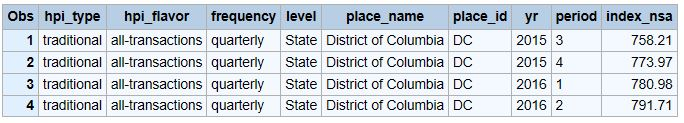

In [22]:
Image(filename='img/default_first_four.jpg')  

Like with polars sort the default SAS sort sequence places its missing values first in the data set as illustrated above.

Displaying the last 4 rows in the 'default_srt' DataFrame finds the 2 NaN's sorted last since this is the default location panda places its missing values.

In [23]:
default_srt.tail(4)  

hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
str,str,str,str,str,str,i64,i64,f64,f64
"""traditional""","""all-transactions""","""quarterly""","""State""","""District of Columbia""","""DC""",2015,3,758.21,null
"""traditional""","""all-transactions""","""quarterly""","""State""","""District of Columbia""","""DC""",2015,4,773.97,null
"""traditional""","""all-transactions""","""quarterly""","""State""","""District of Columbia""","""DC""",2016,1,780.98,null
"""traditional""","""all-transactions""","""quarterly""","""State""","""District of Columbia""","""DC""",2016,2,791.71,null


The SAS program to access the last four observations in the data set is:

````
    /******************************************************/
    /* c12_print_last4_rows_sorted.sas                    */
    /******************************************************/
    79         data last4;  
    80           set df_states (firstobs=96241);
    81           by index_nsa;

    NOTE: 4 observations were read from "WORK.last4"
````    

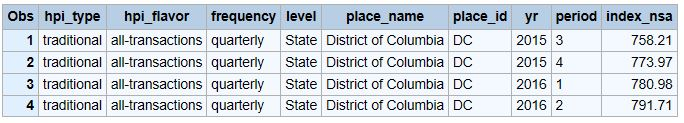

In [24]:
Image(filename='img/sort_last_four.jpg')  

Alter the organization of the 'states_desc' DataFrame by supplying arguments and values to the sort_values() attribute.  The example below sorts descending placeing missing values at the end of the DataFrame.

In [25]:
states_desc = df_states.sort('index_nsa', descending=True, nulls_last=True)

Setting the na_position= argument to 'first' places NaN's at the beginning of the sort sequence.  This is the same beavhior for SAS' sort sequence.  Details describing SAS sort order for missing values is descried <a href="http://support.sas.com/documentation/cdl/en/lrcon/68089/HTML/default/viewer.htm#p0tmoipp0ci6wkn0z27ev47sv0ov.htm"> here </a>.

The first two rows in the DataFrame 'states_desc' contain the NaN's values for the 'index_nsa' column, while the next 2 rows contain the highest values.

In [26]:
states_desc.tail(4)

hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
str,str,str,str,str,str,i64,i64,f64,f64
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""San Jose-Sunnyvale-Santa Clara…","""41940""",1975,4,18.82,null
"""traditional""","""all-transactions""","""quarterly""","""MSA""","""San Francisco-Redwood City-Sou…","""41884""",1975,3,18.31,null
"""traditional""","""all-transactions""","""quarterly""","""State""","""Vermont""","""VT""",1976,1,null,null
"""traditional""","""all-transactions""","""quarterly""","""State""","""West Virginia""","""WV""",1982,1,null,null


SAS has missing 28 missing value indicators for numerics described <a href="http://support.sas.com/documentation/cdl/en/lrcon/68089/HTML/default/viewer.htm#p175x77t7k6kggn1io94yedqagl3.htm"> here </a>.  However, if you want missing values to be 'first' in a data set using an ascending sort sequence, then the missing value indicator must be an actual numeric value larger than the largest non-missing value.  In other words, by default, the SAS missing value indicator for numerics is always the smallest numeric value.

The SAS example below sorts the df_states data set in descending order by the 'index_nsa' variable.  Like the panda example above, the 

    out=states_srt2
    
syntax creates the new SAS data set 'states_srt2'. 

````
    /******************************************************/
    /* c12_print_last4_rows_sorted_descending.sas        */
    /*****************************************************/
    44        proc sort data=df_states
    45           out=states_srt2;
    46           by descending index_nsa;
    NOTE: 96244 observations were read from "WORK.df_states"
    NOTE: Data set "WORK.states_srt2" has 96244 observation(s) and 9 variable(s)
    47        
    48         data first4;
    49           set states_srt2 (obs=4);
    50           by descending index_nsa;
````

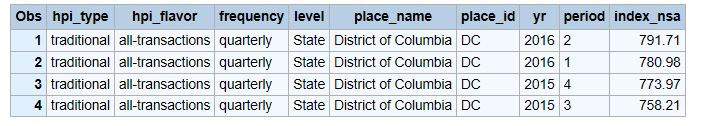

In [27]:
Image(filename='img/sort_last4_descending.jpg')  

The section below examines a number of common data management patterns for analysis. 

####    1. Read the Lending Club Loan Status file.

In [29]:
lc = pl.read_csv(r'data/LC_Loan_Stats.csv')     
lc.shape

(42630, 51)

Check for missing values.  Clearly, some columns are not useful.

In [30]:
lc.null_count()

ID,Member_ID,Loan_Amnt,Term,Int_Rate,Installment,Grade,Sub_Grade,Emp_Length,Home_Ownership,Annual_Inc,Verification_Status,Loan_Status,Purpose,Zip_Code,Addr_State,DTI,Delinq_2yrs,Earliest_Cr_Line,Inq_Last_6mths,Mths_Since_Last_Delinq,Mths_Since_Last_Record,Open_Acc,Pub_Rec,Revol_Bal,Revol_Util,Total_Acc,Initial_List_Status,Out_Prncp,Out_Prncp_Inv,Total_Pymnt,Total_Pymnt_Inv,Total_Rec_Prncp,Total_Rec_Int,Total_Rec_Late_Fee,Recoveries,Collection_Recovery_Fee,Last_Pymnt_D,Last_Pymnt_Amnt,Next_Pymnt_D,Last_Credit_Pull_D,Collections_12_Mths_Ex_Med,Mths_Since_Last_Major_Derog,Policy_Code,Application_Type,Annual_Inc_Joint,Acc_Now_Delinq,Chargeoff_Within_12_Mths,Delinq_Amnt,Pub_Rec_Bankruptcies,Tax_Liens
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,29,29,29,26995,38975,29,29,0,90,29,0,0,0,0,0,0,0,0,0,0,82,0,39409,4,145,42630,0,0,42630,29,145,29,1365,105


## Drop/Keep Columns

Keep some of the columns in the 'lc' DataFrame.

In [31]:
lc = lc.select(
    'ID', 'Member_ID', 'Loan_Amnt', 'Term', 'Int_Rate', 'Installment', 'Grade', 'Sub_Grade', 'Emp_Length',
    'Home_Ownership', 'Annual_Inc', 'Verification_Status', 'Loan_Status', 'Purpose', 'Zip_Code',
    'Addr_State', 'DTI', 'Delinq_2yrs', 'Earliest_Cr_Line', 'Inq_Last_6mths', 'Open_Acc', 'Revol_Bal',                          
    'Revol_Util'
)

## Rename Columns

In [33]:
lc = lc.rename({
           'Member_ID'              :'mem_id',
           'Loan_Amnt'              :'ln_amt',
           'Int_Rate'               :'rate',
           'Home_Ownership'         :'own_rnt',
           'Verification_Status'    :'vrfy_stat',
           'Loan_Status'            :'ln_stat',
           'Addr_State'             :'state',
           'Earliest_Cr_Line'       :'earliest_ln'
    })

Lower-case all the 'lc' DataFrame column names.

In [34]:
# `pl.all()` selects all columns
lc = lc.select(pl.all().name.to_lowercase())

An investigation of the LC_Loan_Stats.csv file reveals it has 2 parts.  The first part, rows 0 to 39786 contain data for those loans meeting their credit policies.  Rows 39790 to the end contain data for those loans that are outside their normal lending policies.  

Create the 'lc1' DataFrame by reading a sub-set of columns and rows. 

In [35]:
lc.head()

id,mem_id,ln_amt,term,rate,installment,grade,sub_grade,emp_length,own_rnt,annual_inc,vrfy_stat,ln_stat,purpose,zip_code,state,dti,delinq_2yrs,earliest_ln,inq_last_6mths,open_acc,revol_bal,revol_util
i64,i64,i64,str,str,f64,str,str,str,str,f64,str,str,str,str,str,f64,i64,str,i64,i64,i64,str
872482,1086681,14000,""" 60 months""","""12.99%""",318.48,"""C""","""C1""","""9 years""","""MORTGAGE""",66996.0,"""Verified""","""Fully Paid""","""debt_consolidation""","""852xx""","""AZ""",21.8,0,"""Sep-00""",0,6,25735,"""82.00%"""
872482,1086681,14000,""" 60 months""","""12.99%""",318.48,"""C""","""C1""","""9 years""","""MORTGAGE""",66996.0,"""Verified""","""Fully Paid""","""debt_consolidation""","""852xx""","""AZ""",21.8,0,"""Sep-00""",0,6,25735,"""82.00%"""
878770,1093592,32000,""" 36 months""","""15.23%""",1112.9,"""C""","""C5""","""7 years""","""MORTGAGE""",60000.0,"""Verified""","""Charged Off""","""debt_consolidation""","""235xx""","""VA""",7.2,0,"""1-Apr""",1,7,5798,"""40.30%"""
878701,1093515,13150,""" 60 months""","""13.49%""",302.52,"""C""","""C2""","""10+ years""","""MORTGAGE""",54000.0,"""Verified""","""Charged Off""","""debt_consolidation""","""850xx""","""AZ""",23.84,0,"""Jan-96""",1,15,35462,"""60%"""
878693,1093457,13200,""" 60 months""","""14.79%""",312.58,"""C""","""C4""","""3 years""","""RENT""",36000.0,"""Source Verified""","""Fully Paid""","""debt_consolidation""","""857xx""","""AZ""",22.03,0,"""Oct-16""",1,10,4932,"""65.80%"""


In [36]:
lc.tail()

id,mem_id,ln_amt,term,rate,installment,grade,sub_grade,emp_length,own_rnt,annual_inc,vrfy_stat,ln_stat,purpose,zip_code,state,dti,delinq_2yrs,earliest_ln,inq_last_6mths,open_acc,revol_bal,revol_util
i64,i64,i64,str,str,f64,str,str,str,str,f64,str,str,str,str,str,f64,i64,str,i64,i64,i64,str
1064932,1298984,20000,""" 36 months""","""0.1427""",686.18,"""C""","""C2""","""10+ years""","""MORTGAGE""",70000.0,"""Verified""","""Fully Paid""","""credit_card""","""770xx""","""TX""",6.21,0,"""37135""",1,6,12377,"""0.89"""
1062248,1294105,9750,""" 36 months""","""0.0751""",303.34,"""A""","""A3""","""4 years""","""RENT""",35000.0,"""Not Verified""","""Charged Off""","""debt_consolidation""","""967xx""","""HI""",29.04,0,"""35309""",1,9,13275,"""0.517"""
1064985,1298830,18000,""" 60 months""","""0.1596""",365.67,"""C""","""C5""","""6 years""","""MORTGAGE""",91000.0,"""Verified""","""Fully Paid""","""credit_card""","""243xx""","""VA""",23.41,0,"""30742""",2,13,46957,"""0.67"""
1064926,1298978,5000,""" 36 months""","""0.0603""",152.18,"""A""","""A1""","""9 years""","""MORTGAGE""",30000.0,"""Not Verified""","""Fully Paid""","""other""","""923xx""","""CA""",16.48,0,"""36678""",0,7,5881,"""0.256"""
1064908,1298959,9000,""" 36 months""","""0.1465""",310.45,"""C""","""C3""","""4 years""","""RENT""",45000.0,"""Source Verified""","""Fully Paid""","""debt_consolidation""","""117xx""","""NY""",17.01,1,"""35004""",1,21,10464,"""0.5"""


In [53]:
lc1 = lc.head(39786)
lc1.shape

(39786, 23)

The analog SAS program for reading sub-sets of rows and columns from the 'LC_Loan_Stats.csv' file.

````
    /******************************************************/
    /* c12_read_1st_half_loan_cvs.sas                     */
    /******************************************************/
    4         options obs=39787;
    5         proc import datafile="c:\data\LC_Loan_Stats.csv"
    6              dbms=csv
    7              out=loans
    8              replace;
    9
    10          data lc1(rename=(Member_ID     = mem_id
    12                        Loan_Amnt        = ln_amt
    13                        Int_Rate         = rate
    14                        Installment      = m_pay
    15                        Sub_Grade        = sub_grd
    16                        Emp_Length       = emp_len
    17                        Home_Ownership   = own_rnt
    18                        Annual_Inc       = income
    19                        Loan_Status      = ln_stat
    20                        Addr_State       = state
    21                        Earliest_Cr_Line = ln_fst
    22                        Inq_Last_6mths   = inq_6mnth));
    23       
    24         set loans(keep =  ID
    25                           Member_ID
    26                           Loan_Amnt
    27                           Term
    28                           Int_Rate
    29                           Installment
    30                           Grade
    31                           Sub_Grade
    32                           Emp_Length
    33                           Home_Ownership
    34                           Annual_Inc
    35                           Loan_Status
    36                           Purpose
    37                           Addr_State
    38                           DTI
    39                           Delinq_2yrs
    40                           Earliest_Cr_Line
    41                           Inq_Last_6mths
    42                           Open_Acc
    43                           Revol_Bal
    44                           Revol_Util);
    45
    46        ln_plcy = 'True';

    NOTE: 39786 observations were read from "WORK.loans"
    NOTE: Data set "WORK.lc1" has 39786 observation(s) and 22 variable(s)
````

## Find Duplicate Values

In the 'lc1' DataFrame we expect to find no duplicate id values.  Setting the .duplicated attribute to False returns all of the duplicate values, in our case for the lc1['id'] column.  The .duplicated() attribute for DataFrames is documented <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html"> here</a>.

False marks all duplicate values as True.  Create the new 'lc1_dups' DataFrame containing the duplicates for the lc1['id'] column.  If its length is zero then there are no duplicates.  Locating the duplicate rows is not the same as removing then which is illustrated below.

Begin by setting the index to the lc1['id'] column.  Next, 
create a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators"> Boolean mask</a> locating the duplicate values for the lc1['id'] column.  The keep='first' argument behaves similiar to SAS FIRST.variable in BY-Group processing.  We want to ignore the first occurance of the **duplicate** 'index' column value and extract the remaining ones.

In [49]:
lc1['id'].is_duplicated()

id
bool
true
true
true
true
true
…
false
false
false


## Extract Duplicate Values

Apply the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators"> Boolean mask using the .loc attribute</a> to create the new 'lc1_dups' DataFrame.  The .shape attribute shows there are 35 rows with duplicate 'id' values.

In [50]:
lc1.head()

id,mem_id,ln_amt,term,rate,installment,grade,sub_grade,emp_length,own_rnt,annual_inc,vrfy_stat,ln_stat,purpose,zip_code,state,dti,delinq_2yrs,earliest_ln,inq_last_6mths,open_acc,revol_bal,revol_util
i64,i64,i64,str,str,f64,str,str,str,str,f64,str,str,str,str,str,f64,i64,str,i64,i64,i64,str
872482,1086681,14000,""" 60 months""","""12.99%""",318.48,"""C""","""C1""","""9 years""","""MORTGAGE""",66996.0,"""Verified""","""Fully Paid""","""debt_consolidation""","""852xx""","""AZ""",21.8,0,"""Sep-00""",0,6,25735,"""82.00%"""
872482,1086681,14000,""" 60 months""","""12.99%""",318.48,"""C""","""C1""","""9 years""","""MORTGAGE""",66996.0,"""Verified""","""Fully Paid""","""debt_consolidation""","""852xx""","""AZ""",21.8,0,"""Sep-00""",0,6,25735,"""82.00%"""
878770,1093592,32000,""" 36 months""","""15.23%""",1112.9,"""C""","""C5""","""7 years""","""MORTGAGE""",60000.0,"""Verified""","""Charged Off""","""debt_consolidation""","""235xx""","""VA""",7.2,0,"""1-Apr""",1,7,5798,"""40.30%"""
878701,1093515,13150,""" 60 months""","""13.49%""",302.52,"""C""","""C2""","""10+ years""","""MORTGAGE""",54000.0,"""Verified""","""Charged Off""","""debt_consolidation""","""850xx""","""AZ""",23.84,0,"""Jan-96""",1,15,35462,"""60%"""
878693,1093457,13200,""" 60 months""","""14.79%""",312.58,"""C""","""C4""","""3 years""","""RENT""",36000.0,"""Source Verified""","""Fully Paid""","""debt_consolidation""","""857xx""","""AZ""",22.03,0,"""Oct-16""",1,10,4932,"""65.80%"""


In [54]:
lc1_dups = lc1.filter(
    pl.col("id").is_first_distinct().not_()
)
lc1_dups.shape

(35, 23)

In [58]:
# to filter by mulitple columns
lc1.filter(
    pl.struct("id", 'emp_length').is_first_distinct().not_()
).shape

(35, 23)

The SAS SORT option <a href="https://support.sas.com/documentation/cdl/en/proc/61895/HTML/default/viewer.htm#a000146878.htm"> NODUPKEY</a> checks for and eliminates observations with duplicate BY values.  The DUPOUT= option names the target SAS data set to write the duplicates.

````
    /******************************************************/
    /* c12_sort_nodupkey.sas                              */
    /******************************************************/
    50       proc sort data = lc1 dupout=lc1_dups nodupkey;
    51          by id;
    NOTE: 39786 observations were read from "WORK.lc1"
    NOTE: 35 observations were found and deleted due to having duplicate sort keys
    NOTE: Data set "WORK.lc1" has 39751 observation(s) and 21 variable(s)
    NOTE: Data set "WORK.lc1_dups" has 35 observation(s) and 21 variable(s)
````

## Drop Duplicate Rows

In [59]:
lc1.shape

(39786, 23)

Use the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html">.drop_duplicates attribute</a> to drop duplicate values.  

In [62]:
print(f'Before: {lc1.height}')
lc1 = lc1.filter(
    pl.col("id").is_first_distinct()
)
print(f'After: {lc1.height}')

Before: 39786
After: 39751


## Add a New DataFrame Column

Create the new column using with_columns as a flag to indicate all rows read from row 2 to 39786 are loans granted within standard lending guidelines. Also, add a 'monthly_inc' derived from annual_inc.

In [67]:
lc1 = lc1.with_columns(
    pl.col('id').map_elements(lambda x: True, return_dtype=pl.Boolean).alias('ln_plcy'),
    (pl.col('annual_inc') / 12).alias('monthly_inc'),
)

## Cast Strings to Floats

In [68]:
lc1.head()

id,mem_id,ln_amt,term,rate,installment,grade,sub_grade,emp_length,own_rnt,annual_inc,vrfy_stat,ln_stat,purpose,zip_code,state,dti,delinq_2yrs,earliest_ln,inq_last_6mths,open_acc,revol_bal,revol_util,ln_plcy,monthly_inc
i64,i64,i64,str,str,f64,str,str,str,str,f64,str,str,str,str,str,f64,i64,str,i64,i64,i64,str,bool,f64
872482,1086681,14000,""" 60 months""","""12.99%""",318.48,"""C""","""C1""","""9 years""","""MORTGAGE""",66996.0,"""Verified""","""Fully Paid""","""debt_consolidation""","""852xx""","""AZ""",21.8,0,"""Sep-00""",0,6,25735,"""82.00%""",true,5583.0
878770,1093592,32000,""" 36 months""","""15.23%""",1112.9,"""C""","""C5""","""7 years""","""MORTGAGE""",60000.0,"""Verified""","""Charged Off""","""debt_consolidation""","""235xx""","""VA""",7.2,0,"""1-Apr""",1,7,5798,"""40.30%""",true,5000.0
878701,1093515,13150,""" 60 months""","""13.49%""",302.52,"""C""","""C2""","""10+ years""","""MORTGAGE""",54000.0,"""Verified""","""Charged Off""","""debt_consolidation""","""850xx""","""AZ""",23.84,0,"""Jan-96""",1,15,35462,"""60%""",true,4500.0
878693,1093457,13200,""" 60 months""","""14.79%""",312.58,"""C""","""C4""","""3 years""","""RENT""",36000.0,"""Source Verified""","""Fully Paid""","""debt_consolidation""","""857xx""","""AZ""",22.03,0,"""Oct-16""",1,10,4932,"""65.80%""",true,3000.0
878728,1093492,14000,""" 60 months""","""14.79%""",331.52,"""C""","""C4""","""< 1 year""","""RENT""",45000.0,"""Source Verified""","""Fully Paid""","""debt_consolidation""","""564xx""","""MN""",14.27,0,"""1-Dec""",2,21,4899,"""12.30%""",true,3750.0


In [26]:
lc1.describe(include=['O'])

,term,rate,grade,sub_grd,emp_len,own_rnt,ln_stat,purpose,state,ln_fst,revol_util
count,39751,39751,39751,39751,39751,39751,39751,39751,39751,39751,39701
unique,2,371,7,35,12,5,7,14,50,529,1092
top,36 months,10.99%,B,B3,10+ years,RENT,Fully Paid,debt_consolidation,CA,Nov-98,0%
freq,29070,958,12021,2918,8891,18893,33639,18661,7095,371,980


Both the lc1['rate'] and lc1['revol_util'] column values are formatted with Excel's percent format (%), making them string values.   The strip_chars function removes specified characters at the beginning and end of the string.  The <cast  converts the string into a float.  The resulting float is divided by 100. A list of polars types is available: https://docs.pola.rs/api/python/stable/reference/datatypes.html

In [73]:
lc1 = lc1.with_columns(
    (pl.col('revol_util').str.strip_chars('%').cast(pl.Float64) / 100.0).alias('revol_util'),
    (pl.col('rate').str.strip_chars('%').cast(pl.Float64) / 100.0).alias('rate'),
)

With the lc1['revol_util'] column values cast to floats use the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2004%20--%20Pandas%2C%20Part%201.ipynb#Missing-Value-Replacement"> .fillna() attribute</a> to replace missing values with the calculated mean value from the lc1['revol_util'] column.

In [76]:
lc1 = lc1.with_columns(
    pl.col('revol_util').fill_null(lc1['revol_util'].mean()).alias('revol_util'),
)

The analog SAS program uses PROC SQL to insert the mean value for 'revol_util' into the SAS Macro variable 'mean_revol'.  A WHERE statement is used to locate the NULL values for the variable 'revol_util' and if found then the UPDATE statement inserts the value from the SAS MACRO variable &mean_revol into the 'revol_util' column.

The CREATE TABLE statement starting at line 13 tests if there are missing values found for the column 'revol_util'.

````
    /******************************************************/
    /* c12_update_missing_revol_until.sas                 */
    /******************************************************/
    6       proc sql;
    7          select mean(revol_util) format 6.2 into :mean_revol
    8          from lc1;
    9       update lc1
    10            set revol_util = &mean_revol
    11            where revol_util is null;
    NOTE: 50 record(s) updated in table WORK.lc1
    12       
    13       create table miss as
    14          select revol_util
    15          from lc1
    16          where revol_util is null;
    NOTE: Data set "WORK.miss" has 0 observation(s) and 1 variable(s)
    17       quit;

````

 ####    2. Read the second portion of the LC_Loan_Stats.csv file beginning with row 39790.

Create the 'lc0' DataFrame by reading the loan status file, supplying a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#tuple"> tuple</a> of integers for the usecols= argument and a tuple of names for the column labels.

In [80]:
lc0 = lc.slice(39_790)
lc0.shape

(2840, 23)

Create the column lc0['ln_plcy'] with a value of False to indicate rows 39790 to the end of the file are loans made outside the standard credit lending policy. The assignment below uses the .map() attribute and calls the anonymous lambda function to create the new column lc0[''ln_plcy'].

In [81]:
lc0 = lc0.with_columns(
    pl.col('id').map_elements(lambda x: False, return_dtype=pl.Boolean).alias('ln_plcy'),
    (pl.col('annual_inc') / 12).alias('monthly_inc'),
)

Similiar to above, the lc0['rate'] and lc0['revol_util'] column values are formatted with Excel's percent format (%), making them string values. The .replace() method replaces the '%' with a white-space. The .astype() attribute converts the string into a float. The resulting float is divided by 100.

In [82]:
lc0 = lc0.with_columns(
    (pl.col('revol_util').str.strip_chars('%').cast(pl.Float64) / 100.0).alias('revol_util'),
    (pl.col('rate').str.strip_chars('%').cast(pl.Float64) / 100.0).alias('rate'),
)

Calculate the mean value for 'revol_util' and use the .fillna method to replace the missing values.

In [83]:
lc1 = lc1.with_columns(
    pl.col('revol_util').fill_null(lc1['revol_util'].mean()).alias('revol_util'),
)

Return the number of missing values.

lc0.revol_util.isnull().sum() 

## Concatenating DataFrames (Join)

[Chapter 6-Polars (part 2)](06-Polars.ipynb) covers joining operations by illustrating the pl.join() method which follows SQL's relational algebraic statements. We can also use concat if the shapes have the same columns.

In [84]:
print(lc0.shape)
print(lc1.shape)

(2840, 25)
(39751, 25)


Use the pd.concat() method to join the 'lc1' and 'lc0' DataFrames.  

In [119]:
df = pl.concat([lc1, lc0])
df.shape

(42591, 25)

The analog SAS program uses the SET statement to join the data sets 'lc0' and 'lc1' together.  The variable names are identical in both data sets. 

````
    /******************************************************/
    /* c12_concatenate_lc0_lc1.sas                        */
    /******************************************************/
    7       data df;
    8          set lc0
    9              lc1;
    10       run;

    NOTE: 2844 observations were read from "WORK.lc0"
    NOTE: 39751 observations were read from "WORK.lc1"
    NOTE: Data set "WORK.df" has 42595 observation(s) and 22 variable(s)
````

## Crosstabs

In [121]:
(df.group_by(["grade", "own_rnt"])
      .agg(pl.len().alias("count"))
      .pivot(values="count", index="grade", on="own_rnt")
      .fill_null(0)
 .sort('grade')
)

grade,OWN,RENT,OTHER,MORTGAGE,NONE
str,u32,u32,u32,u32,u32
"""A""",872,4073,25,5227,5
"""B""",957,5986,36,5427,2
"""C""",642,4494,24,3587,0
"""D""",433,3197,26,2367,0
"""E""",242,1646,14,1498,0
"""F""",75,600,4,620,1
"""G""",36,215,7,253,0


In [123]:
result_df = (df.group_by(["grade", "own_rnt", 'purpose'])
      .agg(pl.len().alias("count"))
      .pivot(values="count", index=["grade", 'own_rnt'], on="purpose")
      .fill_null(0)
 .sort('grade')
)
result_df

grade,own_rnt,vacation,house,small_business,home_improvement,other,educational,credit_card,medical,moving,wedding,major_purchase,car,debt_consolidation,renewable_energy
str,str,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
"""A""","""MORTGAGE""",60,42,187,806,540,36,685,100,49,72,458,359,1813,20
"""A""","""RENT""",61,53,136,66,460,47,638,89,118,154,287,195,1761,8
"""A""","""OWN""",14,6,26,99,116,3,90,23,6,20,90,62,315,2
"""A""","""OTHER""",0,1,2,2,2,2,4,1,0,0,3,1,7,0
"""A""","""NONE""",0,0,0,0,4,0,0,0,0,0,0,0,1,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""F""","""OTHER""",0,0,1,1,0,0,0,1,0,0,0,0,1,0
"""G""","""OWN""",0,1,6,2,3,1,2,1,0,0,4,0,16,0
"""G""","""MORTGAGE""",0,6,36,25,16,1,29,3,1,5,1,1,129,0


In [127]:
# row sums
result_df.with_columns(
    pl.sum_horizontal(pl.all().exclude('grade', 'own_rnt')).alias('total')
).select('grade', 'own_rnt', 'total')

grade,own_rnt,total
str,str,u32
"""A""","""MORTGAGE""",5227
"""A""","""RENT""",4073
"""A""","""OWN""",872
"""A""","""OTHER""",25
"""A""","""NONE""",5
…,…,…
"""F""","""OTHER""",4
"""G""","""OWN""",36
"""G""","""MORTGAGE""",253


In [137]:
# column sums
result_df.select(pl.all().exclude('grade', 'own_rnt')).with_columns(
    pl.all().sum()
).head(1)

vacation,house,small_business,home_improvement,other,educational,credit_card,medical,moving,wedding,major_purchase,car,debt_consolidation,renewable_energy
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
400,427,1993,3203,4426,422,5495,753,629,1003,2310,1613,19811,106


## Sampling

In [144]:
samp = df.sample(n=300)

In [140]:
import seaborn as sns

In [145]:
samp.head()

id,mem_id,ln_amt,term,rate,installment,grade,sub_grade,emp_length,own_rnt,annual_inc,vrfy_stat,ln_stat,purpose,zip_code,state,dti,delinq_2yrs,earliest_ln,inq_last_6mths,open_acc,revol_bal,revol_util,ln_plcy,monthly_inc
i64,i64,i64,str,f64,f64,str,str,str,str,f64,str,str,str,str,str,f64,i64,str,i64,i64,i64,f64,bool,f64
885916,1101646,29700,""" 60 months""",0.1269,671.07,"""B""","""B5""","""10+ years""","""MORTGAGE""",78000.0,"""Verified""","""Charged Off""","""credit_card""","""294xx""","""SC""",19.72,0,"""Dec-94""",0,17,23009,0.328,true,6500.0
403997,450074,5500,""" 36 months""",0.1253,184.07,"""C""","""C1""","""10+ years""","""MORTGAGE""",54912.0,"""Not Verified""","""Fully Paid""","""debt_consolidation""","""801xx""","""CO""",17.55,0,"""Jul-88""",1,10,19279,0.595,true,4576.0
461125,576095,7800,""" 36 months""",0.1183,258.45,"""B""","""B3""","""< 1 year""","""RENT""",85757.0,"""Not Verified""","""Fully Paid""","""educational""","""191xx""","""PA""",8.82,0,"""1-Sep""",0,24,3811,0.058,true,7146.416667
734060,930527,13000,""" 60 months""",0.1714,324.07,"""E""","""E3""","""9 years""","""MORTGAGE""",50000.0,"""Not Verified""","""Fully Paid""","""debt_consolidation""","""347xx""","""FL""",22.73,0,"""Mar-99""",1,7,6320,0.537,true,4166.666667
749229,948444,3500,""" 36 months""",0.1399,119.61,"""C""","""C3""","""< 1 year""","""RENT""",110000.0,"""Source Verified""","""Fully Paid""","""moving""","""066xx""","""CT""",15.5,0,"""2-Sep""",2,9,3668,0.895,true,9166.666667


<Axes: xlabel='grade', ylabel='annual_inc'>

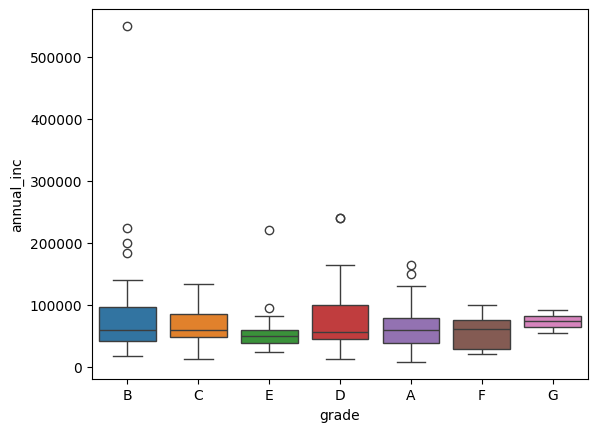

In [146]:
sns.boxplot(data=samp, x='grade', y='annual_inc', hue='grade')

## Binning Continuous Values

Locate the minimum and maximum values.  Scalars are returned.  Returning a row using a minimum value is illustrated <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2009%20--%20Panda%20Time%20Series%20and%20Date%20Handling.ipynb#Return-a-Row-using-a-Minimum-Value"> here</a>  and for maximum value <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2009%20--%20Panda%20Time%20Series%20and%20Date%20Handling.ipynb#Return-a-Row-using-a-Maximum-Value"> here</a>.

In [147]:
print(df['dti'].min())
print(df['dti'].max())

0.0
29.99


Create the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#list"> list</a> 'bins' containing integer values used to define bin levels.  Construct the list 'names' to define the labels for the bins. 

In [149]:
bins = [5, 10, 15, 20, 25]
names=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%']
df = df.with_columns(
    pl.col('dti').cut(breaks=bins, labels=names).alias('dti_cat')
)
df['dti_cat'].value_counts(sort=True)

dti_cat,count
cat,u32
"""10-15%""",10500
"""15-20%""",9774
"""5-10%""",8563
"""20-25%""",7375
"""0-5%""",5552
"""25-30%""",827


Return the count of missing values for the df['income'] column.

In [150]:
df['annual_inc'].is_null().sum()

4

Call the .fillna() method to replace missing values for the df['income'] column with the calcuated column mean.  Additional examples for detecting and replacing missing values are described <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2004%20--%20Pandas%2C%20Part%201.ipynb#Handling-Missing-Data"> here</a>.

In [152]:
df = df.with_columns(
    pl.col('annual_inc').fill_null(df['annual_inc'].mean())
)

In [154]:
print(df['annual_inc'].min())
print(df['annual_inc'].max())

1896.0
6000000.0


Call the pd.qcut() method for creating deciles for the df['income'] column and copy them into the new df['inc_cat'] column.  A more detailed example of creating deciles is described in the section <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Understanding-Binning"> Understanding Binning</a> in Chapter 10--GroupBy.

In [157]:
df = df.with_columns(
    pl.col("annual_inc").qcut(10).to_physical().alias("inc_cat_dec_code")
)

Return the count of values from the income decile values in the df['inc_cat'] column.

In [159]:
df['inc_cat_dec_code'].value_counts()

inc_cat_dec_code,count
u32,u32
9,3433
14,4435
15,5088
8,4309
6,4252
10,4306
12,4259
11,4264
7,4163


The df['inc_cat'] column containing income deciles used as the rows and values for df['grade'] nested inside values from the df['ln_plcy'] column as the header in a Crosstab.

In [163]:
result_df = (df.group_by(["inc_cat_dec_code", 'ln_plcy', 'grade'])
      .agg(pl.len().alias("count"))
      .pivot(values="count", index=["inc_cat_dec_code"], on=['ln_plcy', 'grade'])
      .fill_null(0)
 .sort('inc_cat_dec_code')
)
result_df

inc_cat_dec_code,"{true,""A""}","{true,""F""}","{false,""G""}","{true,""G""}","{false,""E""}","{false,""F""}","{true,""C""}","{true,""B""}","{false,""C""}","{false,""D""}","{true,""D""}","{false,""B""}","{true,""E""}","{false,""A""}"
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
6,1037,122,13,33,45,25,753,1224,50,61,537,37,303,12
7,1023,110,23,29,40,20,789,1177,54,54,524,29,281,10
8,1070,91,16,21,55,25,805,1221,65,66,531,26,309,8
9,824,57,9,12,57,19,711,999,46,54,427,29,183,6
10,1034,75,16,16,58,23,887,1196,57,62,565,39,263,15
11,1025,62,17,20,53,20,849,1264,71,84,522,25,242,10
12,874,185,40,76,49,28,727,1115,66,77,534,45,429,14
13,940,160,18,56,38,23,763,1094,66,57,499,43,316,9
14,1033,140,23,40,56,33,791,1263,67,55,559,41,318,16


## Save to Disk

In [49]:
df.write_parquet('lending_club.parquet')

We can also write the 'lc0' and 'lc1' DataFrames out as a .csv files.

In [50]:
lc0.write_csv("C:\Data\\Loans_lc0.csv")
lc1.write_csv("C:\Data\\Loans_lc1.csv")

## Resources


## Navigation

* [Return to Contents](00-Contents.ipynb)